In [30]:
import cv2
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import ctypes

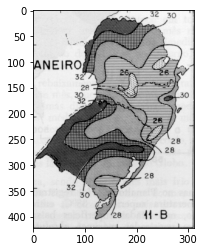

In [31]:
ax = cv2.imread('janei.pgm',cv2.IMREAD_GRAYSCALE)
img = mpimg.imread('janei.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

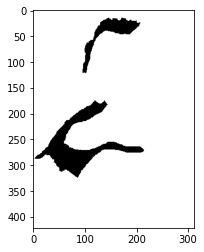

In [32]:
ay = cv2.imread('janei-1.pgm',cv2.IMREAD_GRAYSCALE)
img = mpimg.imread('janei-1.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

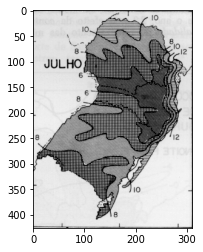

In [33]:
qx = cv2.imread('julho.pgm',cv2.IMREAD_GRAYSCALE)
img = mpimg.imread('julho.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [34]:
ax = np.float32(ax)
ay = np.float32(ay)
qx = np.float32(qx)

In [35]:
def hamming(a, b):
    soma = 0
    bit = 1
    for i in range(9):
        if((a & bit) != (b & bit)):
            soma = soma+1
        i = i*2
    return soma

In [36]:
tabela = ctypes.c_uint8(np.zeros((512,128)))
for l in range(1, len(ax)-1):
    for c in range(1, len(ax[0])-1):
        indice = 0
        for l2 in range(-1, 1):
            for c2 in range(-1, 1):
                t = 1
                if(ax[l+l2, c+c2] == 0):
                    t = 0
                indice = 2*indice + t
        tabela[indice] = ay[l,c]         

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
qp = np.int32(np.zeros((len(qx),len(qx[0]),255)))
for indice in range(0,512):
    if(tabela[indice] == 128):
        mindist = sys.maxsize * 2 + 1
        minsai = 0
        for j in range(512):
            if(tabela[j]!=128):
                dist = hamming(indice,j)
                if(dist<mindist):
                    mindist=dist
                    minsai=tabela[j]
        tabela[indice] = minsai

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
cv2.imwrite('qp.pgm', qp)
img = mpimg.imread('qp.pgm')
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

NameError: name 'qp' is not defined